## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import io

# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly 
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import spacy 
from langid.langid import LanguageIdentifier, model

from collections import Counter
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import emoji
import spacy
import string

%matplotlib inline
plt.style.use('seaborn')

## Load in DataFrame

In [3]:
tweets = pd.read_csv('../data/final_tweets_df.csv', index_col = 0)

## Intial Look At the Data

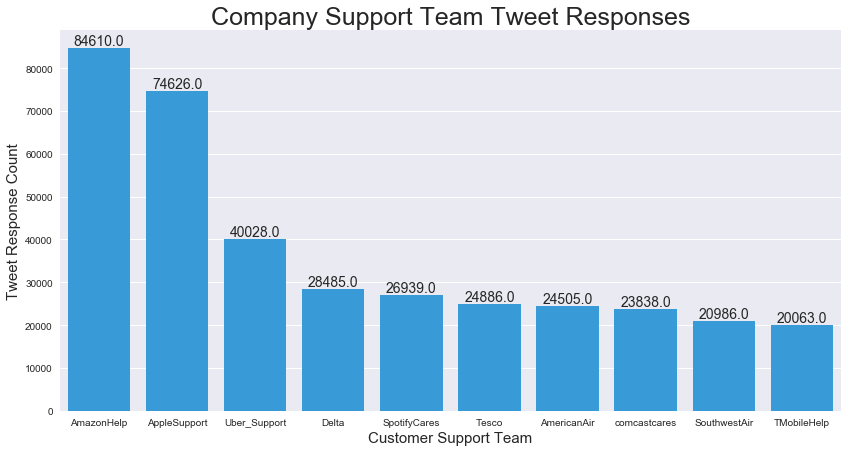

In [110]:
company_count = pd.DataFrame(tweets.groupby('company_name').count()['customer_tweet_id']).reset_index()
company_count.sort_values('customer_tweet_id', ascending=False, inplace = True)
ncount = len(company_count)
fig, ax = plt.subplots(figsize = (14, 7))

ax = sns.barplot(x = company_count.company_name[:10], y = company_count.customer_tweet_id, color = '#1DA1F2')
ax.set_xlabel('Customer Support Team', fontsize = 15)
ax.set_ylabel('Tweet Response Count', fontsize = 15)
ax.set_title('Company Support Team Tweet Responses', fontsize = 25)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom', fontsize = 14) 
plt.savefig('../graphs/Company_Support_Team_Tweet_Counts.png', dpi = 500, bbox_inches='tight');

In [5]:
day_of_tweet = pd.DataFrame(tweets.groupby('day_tweeted').count()[
                            'customer_tweet_id']).reset_index()
day_of_tweet['day_tweeted'] = pd.Categorical(day_of_tweet['day_tweeted'], [
                                   "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
day_of_tweet.sort_values('day_tweeted', inplace = True)



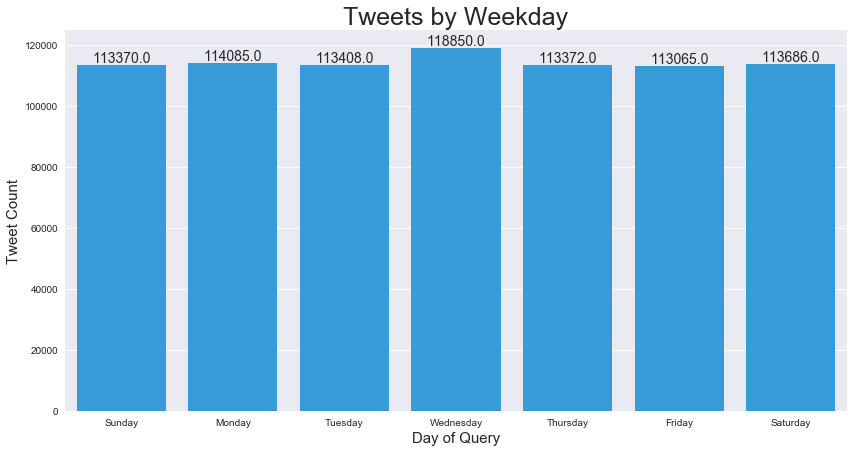

In [111]:

fig, ax = plt.subplots(figsize = (14, 7))

ax = sns.barplot(x = day_of_tweet.day_tweeted, y = day_of_tweet.customer_tweet_id, color = '#1DA1F2')
ax.set_xlabel('Day of Query', fontsize = 15)
ax.set_ylabel('Tweet Count', fontsize = 15)
ax.set_title('Tweets by Weekday', fontsize = 25)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom', fontsize = 14) 

plt.savefig('../graphs/Tweets_by_Weekday.png', dpi = 500, bbox_inches='tight');

In [7]:
tweets2 = pd.read_csv('../../customer_support_tweets.csv', index_col = 0)
tweets2.time_tweeted = pd.to_datetime(tweets2.time_tweeted)
tweets2['day_of_week'] = tweets2.time_tweeted.apply(lambda x: x.dayofweek)
tweets2['hour'] = tweets2.time_tweeted.apply(lambda x: x.hour)

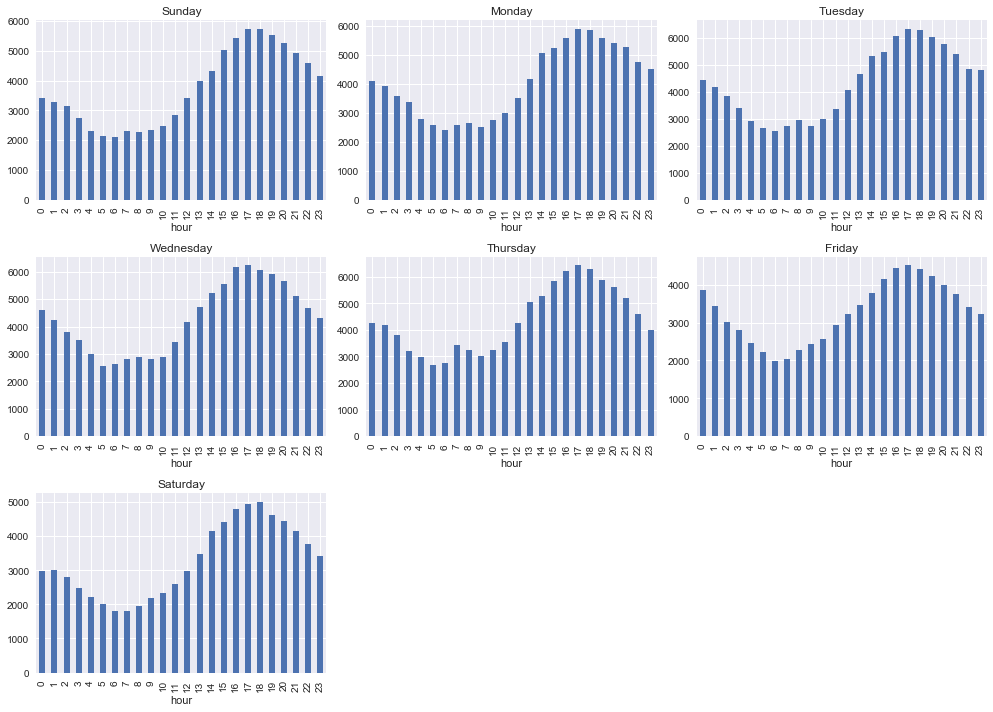

In [112]:
hour_and_day = pd.DataFrame(tweets2.groupby(['day_of_week', 'hour']).count()['customer_tweet_id'])
f, a = plt.subplots(3,3, figsize = (14,10), squeeze=False)

hour_and_day.xs(0).plot(kind='bar',ax=a[0,0])
a[0,0].set_title('Sunday')
a[0,0].get_legend().remove()

hour_and_day.xs(1).plot(kind='bar',ax=a[0,1])
a[0,1].set_title('Monday')
a[0,1].get_legend().remove()

hour_and_day.xs(2).plot(kind='bar',ax=a[0,2])
a[0,2].set_title('Tuesday')
a[0,2].get_legend().remove()

hour_and_day.xs(3).plot(kind='bar',ax=a[1,0])
a[1,0].set_title('Wednesday')
a[1,0].get_legend().remove()

hour_and_day.xs(4).plot(kind='bar',ax=a[1,1])
a[1,1].set_title('Thursday')
a[1,1].get_legend().remove()

hour_and_day.xs(5).plot(kind='bar',ax=a[1,2])
a[1,2].set_title('Friday')
a[1,2].get_legend().remove()

hour_and_day.xs(6).plot(kind='bar',ax=a[2,0])
a[2,0].set_title('Saturday')
a[2,0].get_legend().remove()


plt.tight_layout()
f.delaxes(a[2,1])
f.delaxes(a[2,2])

plt.savefig('../graphs/Distribution_of_tweets.png', dpi = 500, bbox_inches = 'tight')

In [116]:
time_response

,minutes_to_respond,customer_tweet_id
0,0.0,3
1,1.0,9569
2,2.0,36790
3,3.0,38474
4,4.0,34134
...,...,...
9584,823595.0,1
9585,1400143.0,1
9586,1815925.0,1
9587,2588199.0,1


Text(0.5, 1.0, 'Company Support Team Tweet Responses')

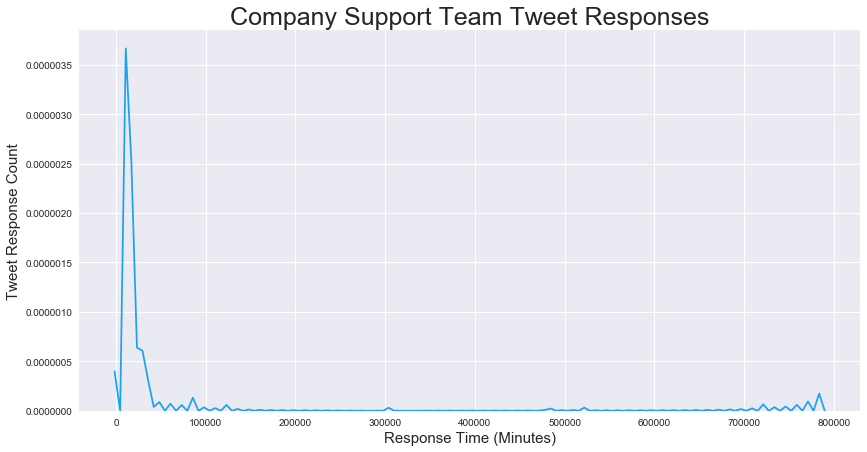

In [18]:
time_response = pd.DataFrame(tweets.groupby('minutes_to_respond').count()['customer_tweet_id']).reset_index()

fig, ax = plt.subplots(figsize = (14, 7))

ax = sns.distplot(time_response.minutes_to_respond, hist = False, kde = True, color='#1DA1F2')
ax.set_xlabel('Response Time (Minutes)', fontsize = 15)
ax.set_ylabel('Tweet Response Count', fontsize = 15)
ax.set_title('Company Support Team Tweet Responses', fontsize = 25)

# plt.savefig('../graphs/Response_time_general.png', dpi = 500, bbox_inches='tight');

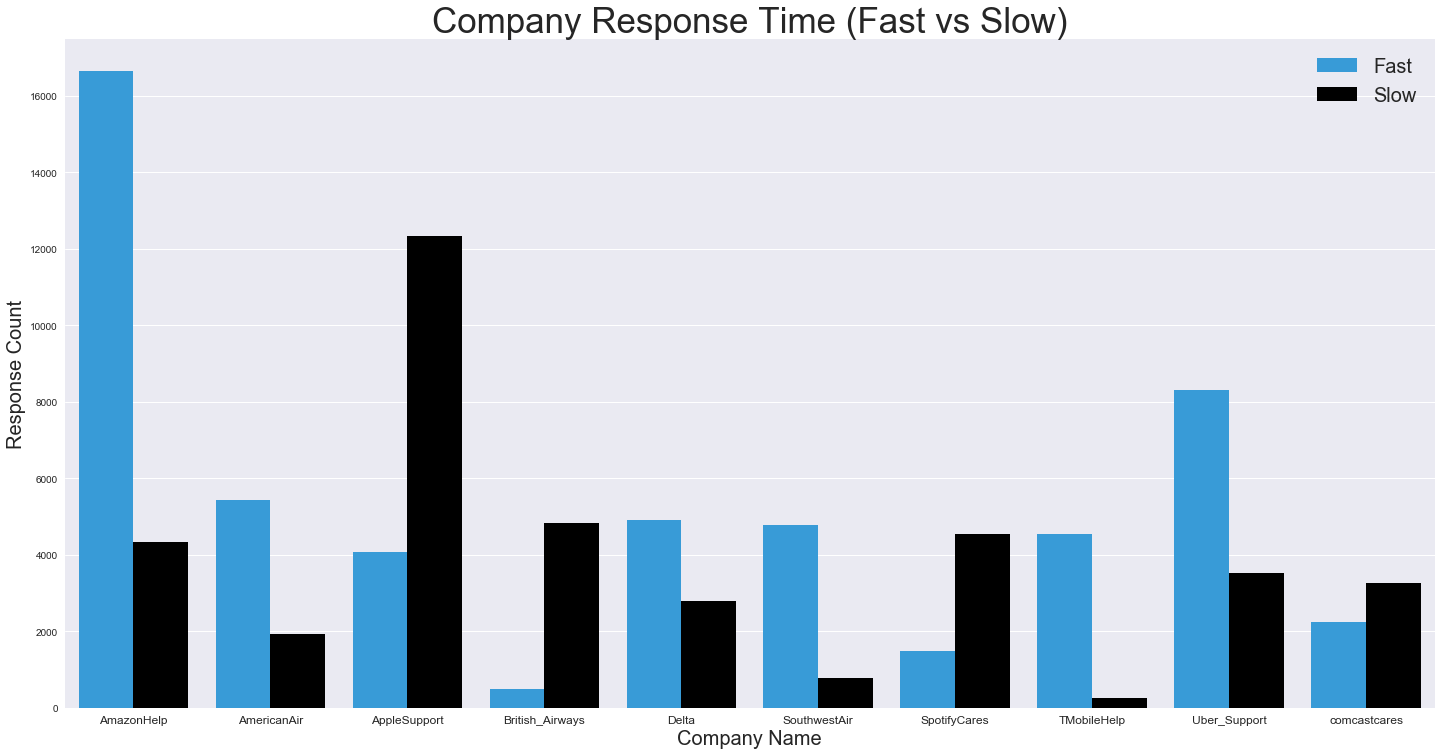

In [22]:
company_speed = pd.DataFrame(tweets.groupby(['company_name', 'Reponse_Speed']).count()['customer_tweet_id']).reset_index()
b = list(pd.DataFrame(company_speed.groupby('company_name').sum()['customer_tweet_id'].sort_values(ascending = False)[:10]).reset_index()['company_name'])
company_speed = company_speed[company_speed['company_name'].isin(b)]

g = sns.catplot(x="company_name", y="customer_tweet_id", hue="Reponse_Speed", data=company_speed,
                height=10, kind="bar", palette=sns.color_palette(['#1DA1F2', 'black']), legend = False, aspect=2)
plt.title("Company Response Time (Fast vs Slow)", fontsize =35)
plt.legend(fontsize = 20)
plt.ylabel('Response Count', fontsize = 20)
plt.xlabel('Company Name', fontsize = 20)
plt.xticks(fontsize=12)

# plt.savefig('../graphs/Company_Response_Times.png', dpi = 500, bbox_inches='tight');